In [275]:
import numpy as np
import matplotlib.pyplot as plt

In [276]:
# Data split function
def random_split_data(X, y, train_percentage=0.8, test_percentage=0.20):
    data_count = X.shape[0]
    indices = np.arange(data_count)
    np.random.shuffle(indices)

    # Split data into training and test sets
    train_count = int(data_count * train_percentage)
    test_count = int(data_count * test_percentage)
    print(train_count,
          test_count)
    train_indices = indices[:train_count]
    test_indices = indices[-test_count:]
    # Create sets
    XTrain, yTrain = X[train_indices], y[train_indices]
    XTest, yTest = X[test_indices], y[test_indices]

    return XTrain, yTrain, XTest, yTest

240 60
[[ 0.          0.          0.        ]
 [ 0.07046365 -0.0596642  -0.05400731]
 [ 0.12410861 -0.12372126 -0.09500917]
 [ 0.20084884 -0.18147767 -0.1586384 ]
 [ 0.34147321 -0.22655404 -0.22724532]
 [ 0.44485137 -0.27229694 -0.2941529 ]
 [ 0.54545015 -0.31908874 -0.36074709]
 [ 0.54350202 -0.41489171 -0.38492226]
 [ 0.67793651 -0.45580727 -0.45186796]
 [ 0.86976042 -0.36620288 -0.64467235]]


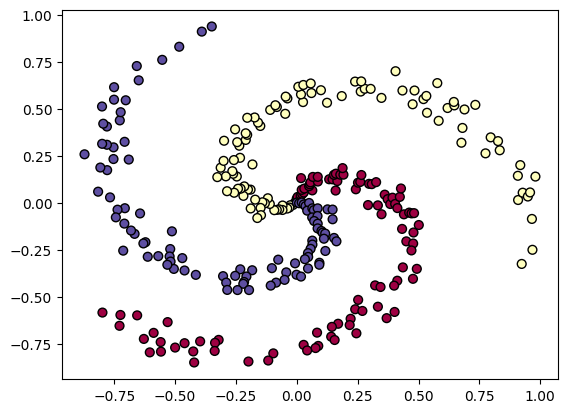

In [277]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
N = 100
H = 100  # Number of hidden units. This is a hyperparameter.
D = 2
K = 3

# Initialize data and labels
X = np.zeros((N * K, D))  # Train Data
y = np.zeros(N * K, dtype="uint8")  # Label array

# Initialize weights and biases for the neural network and splitting the data as train and test data.
# Initialize weights and biases for the neural network
W1 = np.random.randn(D, H)
b1 = np.zeros(H)
W2 = np.random.randn(H, K)
b2 = np.zeros(K)

# Calculate initial scores
# Generate synthetic dataset, fill in X array with synthetic data values.
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

X_train, y_train, X_test, y_test = random_split_data(X, y)
# Calculating initial score:
score = np.dot(np.maximum(0, np.dot(X, W1) + b1), W2) + b2

print(score[:10])
# Plot the synthetic dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="k")
plt.show()

In [278]:
def forward_pass(X, W1, b1, W2, b2):
    # Forward pass through the neural network
    # ReLU activation for hidden layer, scores of first layer (hidden layer) is stored in this variable.
    hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
    scores = np.dot(hidden_layer, W2) + b2
    # Final output of 2-Layer Neural Network.
    return hidden_layer, scores

In [279]:

def calculate_accuracy(X, y, W1, b1, W2, b2):
    data_count = X.shape[0]
    # Forward pass through the neural network
    hidden_layer, scores = forward_pass(X, W1, b1, W2, b2)

    predicted_labels = np.argmax(scores, axis=1)
    correct_predictions = np.sum(predicted_labels == y)

    accuracy = correct_predictions / data_count
    return accuracy

Cross-entropy loss and backpropagation:


In [280]:
def CrossEntropyLossNN(X, y, W1, b1, W2, b2):
    # Forward pass
    hidden_layer, scores = forward_pass(X, W1, b1, W2, b2)

    # Softmax function to get probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute cross-entropy loss
    correct_logprobs = -np.log(probs[range(X.shape[0]), y])
    loss = np.sum(correct_logprobs) / X.shape[0]

    return loss, hidden_layer, probs


def ComputeGradientNN(X, y, W1, b1, W2, b2, hidden_layer, probs):
    # Backpropagation
    ds = probs
    ds[range(X.shape[0]), y] -= 1
    ds /= X.shape[0]
    # ds is initialized as probs. Then, each correct probability is decremented by 1. This is done for  adjusting the model to focus more on correct classes.
    # Then this score values are divided by data count for normalization.

    # Gradient for the second layer (output layer)
    # Gradient for the first layer (hidden layer) through ReLU activation. ReLU activation for hidden layer has done on data X and weight matrix W1. So scores of first layer is stored in "hidden layer".
    dW2 = hidden_layer.T.dot(ds)
    db2 = np.sum(ds, axis=0)
    # Gradient for the second bias (output layer)

    dhidden = ds.dot(W2.T)
    dhidden[hidden_layer <= 0] = 0  # ReLU gradient

    # Gradient for the first layer (input layer)
    dW1 = X.T.dot(dhidden)
    db1 = np.sum(dhidden, axis=0)

    return dW1, db1, dW2, db2

In [282]:
def train_neural_network(X, y, W1, b1, W2, b2, learning_rate=0.001, num_epochs=10000):
    losses = []

    for epoch in range(num_epochs):
        # Forward and backward pass
        loss, hidden_layer, probs = CrossEntropyLossNN(X, y, W1, b1, W2, b2)

        dW1, db1, dW2, db2 = ComputeGradientNN(
            X, y, W1, b1, W2, b2, hidden_layer, probs)

        # Update weights
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Save the current loss and accuracy for later analysis or plotting.
        losses.append(loss)

    return W1, b1, W2, b2, losses

In [283]:
def plot_neural_network_decision_boundary(msg, X, y, W1, b1, W2, b2):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Forward pass through the neural network to get predictions
    hidden_layer, Z = forward_pass(
        np.c_[xx.ravel(), yy.ravel()], W1, b1, W2, b2)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40,
                cmap=plt.cm.Spectral, edgecolors="k")
    plt.title(msg)
    plt.show()

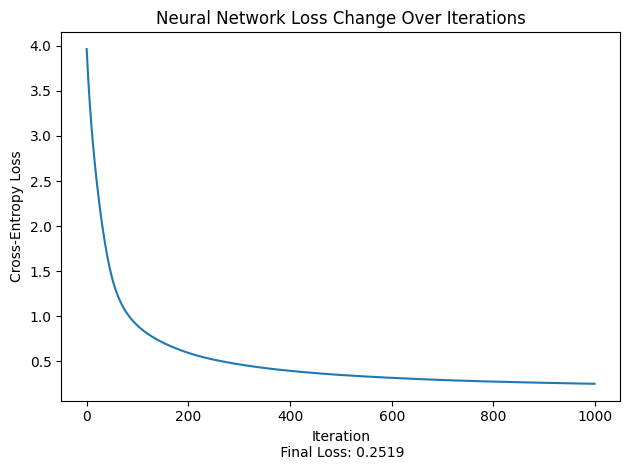

Accuracy over test data:  0.9666666666666667


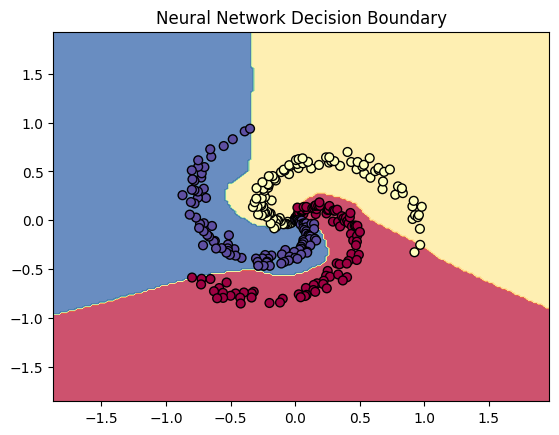

In [284]:

# Train the neural network
W1_trained, b1_trained, W2_trained, b2_trained, nn_losses = train_neural_network(
    X_train,
    y_train,
    W1,
    b1,
    W2,
    b2,
    learning_rate=0.01,
    num_epochs=1000
)

testData_accuracy = calculate_accuracy(
    X_test, y_test, W1_trained, b1_trained, W2_trained, b2_trained)

# Plotting Loss and Accuracy in one column
plt.plot(nn_losses)
plt.xlabel(f'Iteration\n Final Loss: {nn_losses[-1]:.4f}')
plt.ylabel('Cross-Entropy Loss')
plt.title('Neural Network Loss Change Over Iterations')
plt.tight_layout()
plt.show()

print("Accuracy over test data: ", testData_accuracy)


# Plot the learned decision boundaries for the neural network
plot_neural_network_decision_boundary(
    "Neural Network Decision Boundary", X, y, W1_trained, b1_trained, W2_trained, b2_trained)

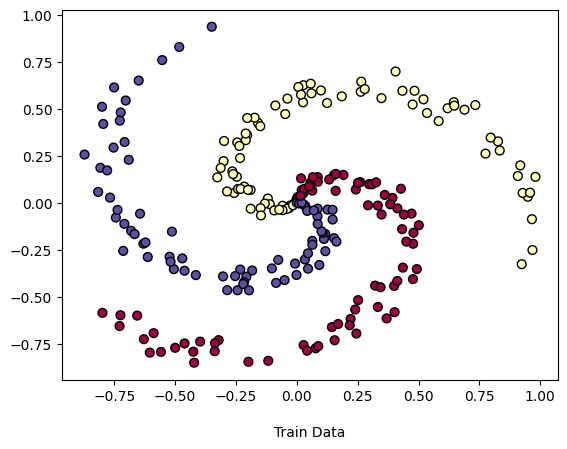

In [285]:
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, s=40, cmap=plt.cm.Spectral, edgecolors="k")
plt.xlabel('\nTrain Data')

plt.show()

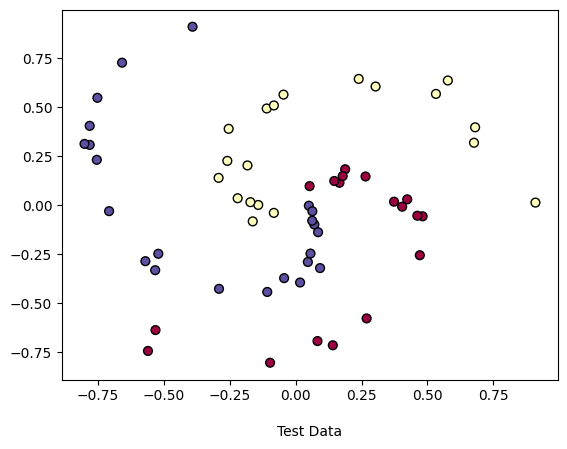

In [286]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
            s=40, cmap=plt.cm.Spectral, edgecolors="k")


plt.xlabel('\nTest Data')


plt.show()